# Calculo de Risco de ativos

In [1]:
#vamos caregar o modulo pandas
import pandas as pd
#importar biblioteca do pandas datareader
from pandas_datareader import data as pdr
#importar a bliblioteca Numpy
import numpy as np
import matplotlib.pyplot as plt

In [4]:
carteira = ['FB','MSFT']
mdata = pd.DataFrame()
for t in carteira:
    mdata[t] = pdr.DataReader(t,data_source='yahoo',start='2013-1-1')['Adj Close']

In [6]:
mdata.head()

,FB,MSFT
Date,,
2013-01-02,28.000000,23.362539
2013-01-03,27.770000,23.049566
2013-01-04,28.760000,22.618179
2013-01-07,29.420000,22.575893
2013-01-08,29.059999,22.457466


# vamos normalizar os dados para que quando plotados em um grafico todos saiam do msm ponto (Pt/p0)*100

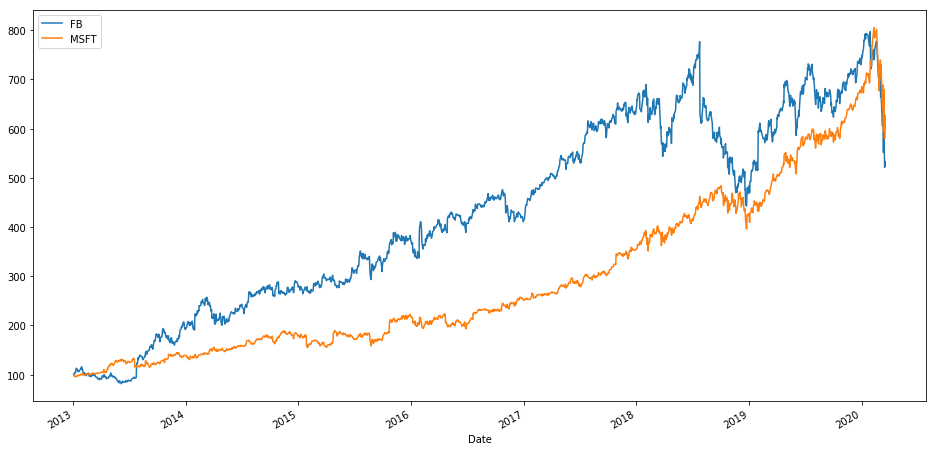

In [27]:
#normalizar valores pegos os valores da primeira possição e transformo na base 100 ai todos vao sair da msm origem
#va
(mdata / mdata.iloc[0] * 100).plot(figsize = (16,8));

In [23]:
#vamos criar um data frame novo com os dados de retorno em log... sabemos que em log é o melhor jeito se for ativos individuais
df_log= np.log(mdata / mdata.shift(1))
print(df_log.head())

                  FB      MSFT
Date                          
2013-01-02       NaN       NaN
2013-01-03 -0.008248 -0.013487
2013-01-04  0.035029 -0.018893
2013-01-07  0.022689 -0.001871
2013-01-08 -0.012312 -0.005260


# Facebook

In [9]:
#media diaria de variação 
df_log['FB'].mean()

0.0009139779362826145

In [10]:
#media anual de variação 
df_log['FB'].mean() * 250

0.22849448407065365

In [12]:
#desvio padrao
df_log['FB'].std()

0.02093348306141575

In [13]:
#volatilidade
df_log['FB'].std() *250 **0.5

0.330987429173141

# Microsoft

In [17]:
#media diaria de variação 
df_log['MSFT'].mean()


0.000988622708668693

In [18]:
#desvio pasrao
df_log['MSFT'].std()


0.01603944822004159

In [19]:
#volatilidade
df_log['MSFT'].std() *250 **0.5

0.253605943938325

In [21]:
#media anual 
df_log['MSFT'].mean() * 250


0.24715567716717324

In [26]:
#volatilidade dos dois no msm codigo
#Obs: Cuidado isso so deu certo pq coloquei dois cochetes falando para o numpy qye se trata de duas matrizes,
#Obs: se fosse apenas um cochetes daria erro pq nao tem como ter dois espaço vetorial em um espaço 
df_log[['MSFT','FB']].std() *250 **0.5

MSFT    0.253606
FB      0.330987
dtype: float64